# Make an inventory of downloaded data
- Spatial Extent
- Temporal Extent
- type of data

In [6]:
%matplotlib inline

In [7]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (12, 7), 'font.size': 10})

import hvplot
import hvplot.pandas
import geoviews as gv

In [8]:
base_folder = '/fs/project/howat.4/icesat2' #/antarctica_tiles_ATL06

In [9]:
dem_region = 'antarctica' # greenland antarctica
year = '2020'
# metadata_folder = f'{base_folder}/antarctica_tiles_ATL06/metadata/2018'
metadata_folder = f'{base_folder}/{dem_region}_tiles_ATL06/metadata'
os.listdir(metadata_folder)

['img2018',
 'is2count_2018.shp',
 'is2count_2018.shx',
 'is2count_2018.dbf',
 'is2count_2018.cpg',
 'is2count_2018.prj',
 'img2019',
 'img2020',
 'is2count_2019.shp',
 'is2count_2019.shx',
 'is2count_2019.dbf',
 'is2count_2019.cpg',
 'is2count_2019.prj',
 'is2count_2020.shp',
 'is2count_2020.shx',
 'is2count_2020.dbf',
 'is2count_2020.cpg',
 'is2count_2020.prj']

In [10]:
gdf = gpd.read_file(f'{metadata_folder}/is2count_{year}.shp')
gdf.index = gdf.name
gdf['row'] = gdf.row.astype(int)
gdf['col'] = gdf.col.astype(int)
gdf.head()

,name,lat,row,col,pt_count,file_count,geometry
name,,,,,,,
34_23,34_23,-82.386155,34,23,71537,5,"POLYGON ((-800000.000 400000.000, -700000.000 ..."
30_14,30_14,-74.889536,30,14,160894,20,"POLYGON ((-1700000.000 0.000, -1600000.000 0.0..."
11_40,11_40,-70.224578,11,40,238008,15,"POLYGON ((900000.000 -1900000.000, 1000000.000..."
32_18,32_18,-78.447549,32,18,127601,12,"POLYGON ((-1300000.000 200000.000, -1200000.00..."
33_14,33_14,-74.725822,33,14,92818,19,"POLYGON ((-1700000.000 300000.000, -1600000.00..."


In [11]:
# gdf.pt_count.min()
gdf = gdf[gdf.pt_count>0]

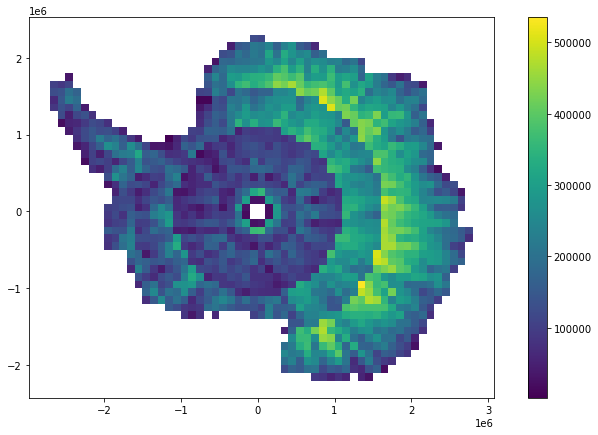

In [12]:
gdf.plot(column='pt_count', legend=True);

In [27]:
# gdf.hvplot(geo=False, color='file_count', frame_width=900, frame_height=700, cmap='coolwarm') #, cnorm='log'
gdf.hvplot(geo=False, color='pt_count', frame_width=700, frame_height=600, cmap='coolwarm') + gdf.hvplot(geo=False, color='file_count', frame_width=700, frame_height=600, cmap='coolwarm')

:Layout
   .Polygons.I  :Polygons   [x,y]   (pt_count)
   .Polygons.II :Polygons   [x,y]   (file_count)

In [28]:
gdf.pt_count.max()

535002

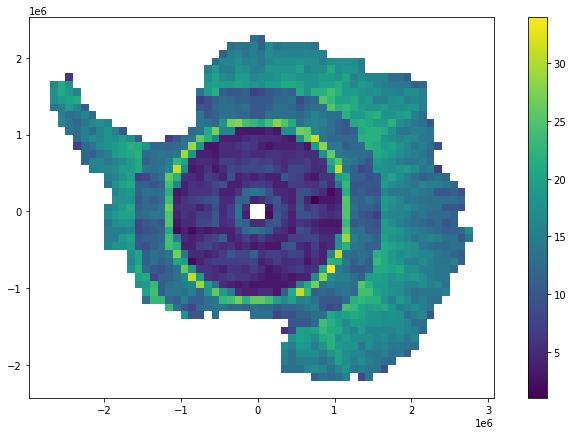

In [14]:
gdf.plot(column='file_count', legend=True);

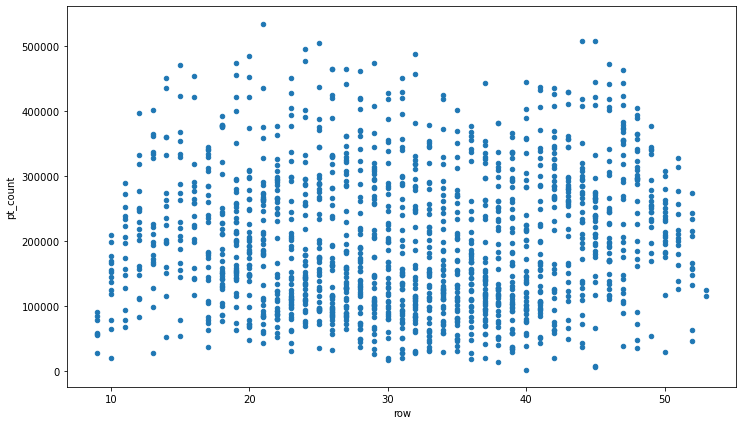

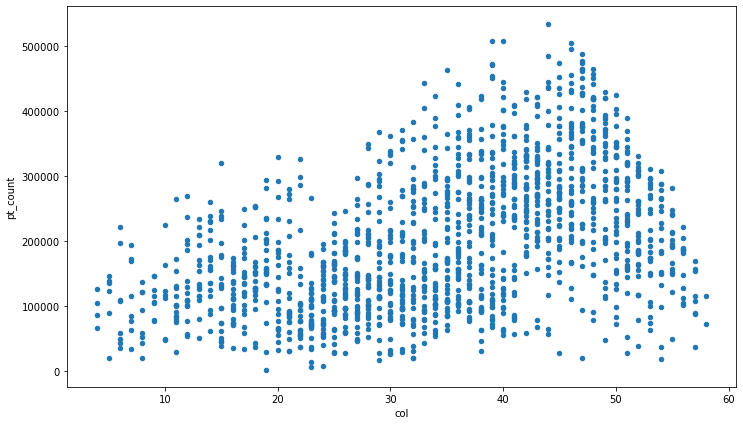

In [16]:
gdf[['row', 'pt_count']].plot(kind='scatter', x=0, y=1)
gdf[['col', 'pt_count']].plot(kind='scatter', x=0, y=1);

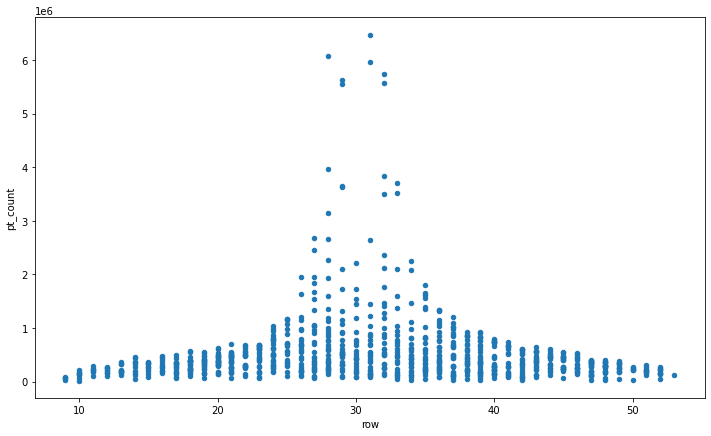

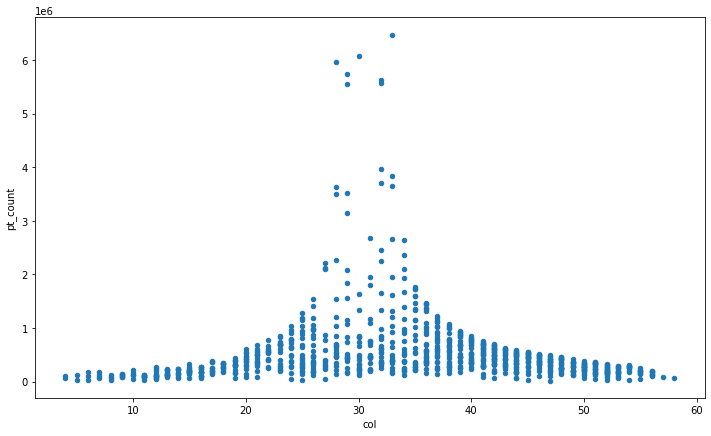

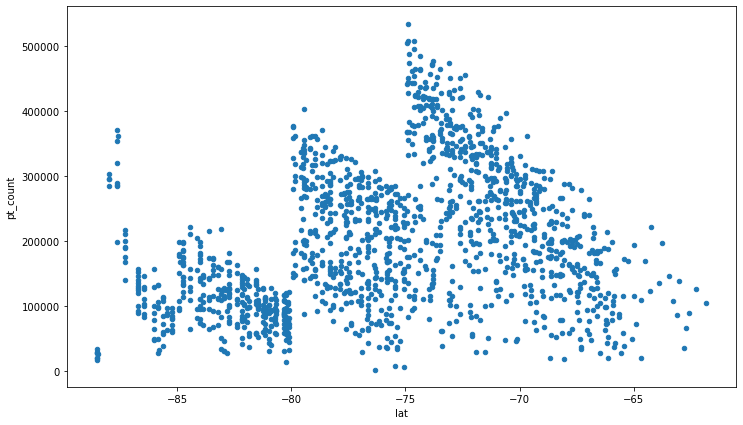

In [17]:
gdf[['lat', 'pt_count']].plot(kind='scatter', x=0, y=1);

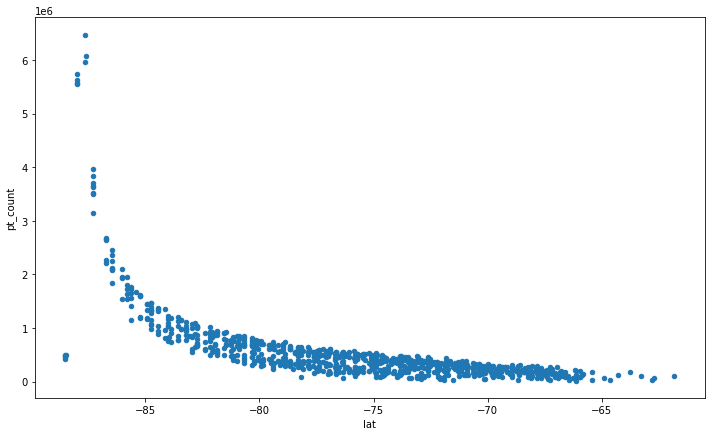

In [19]:
gdf.hvplot.scatter(x='lat', y='pt_count')

:Scatter   [lat]   (pt_count)

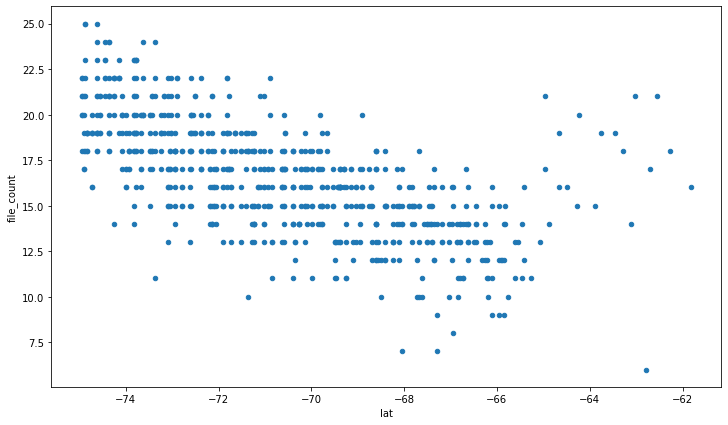

In [20]:
gdf[gdf.lat>-75][['lat', 'file_count']].plot(kind='scatter', x=0, y=1);

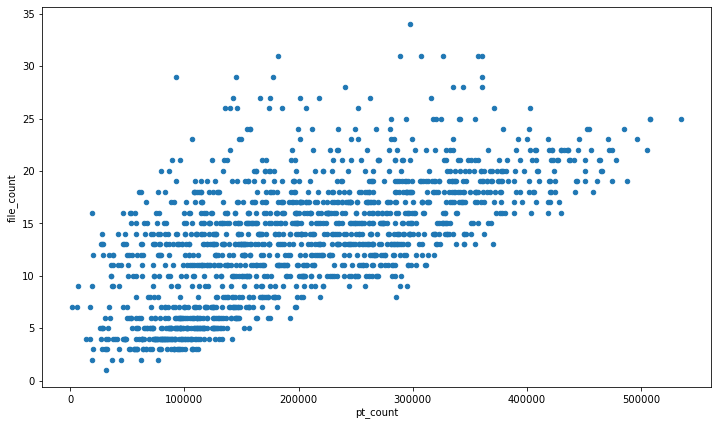

In [21]:
gdf[['pt_count', 'file_count']].plot(kind='scatter', x=0, y=1);

In [22]:
gdf

,name,lat,row,col,pt_count,file_count,geometry
name,,,,,,,
34_23,34_23,-82.386155,34,23,71537,5,"POLYGON ((-800000.000 400000.000, -700000.000 ..."
30_14,30_14,-74.889536,30,14,160894,20,"POLYGON ((-1700000.000 0.000, -1600000.000 0.0..."
11_40,11_40,-70.224578,11,40,238008,15,"POLYGON ((900000.000 -1900000.000, 1000000.000..."
32_18,32_18,-78.447549,32,18,127601,12,"POLYGON ((-1300000.000 200000.000, -1200000.00..."
33_14,33_14,-74.725822,33,14,92818,19,"POLYGON ((-1700000.000 300000.000, -1600000.00..."
...,...,...,...,...,...,...,...
50_28,50_28,-72.046589,50,28,195260,17,"POLYGON ((-300000.000 2000000.000, -200000.000..."
42_24,42_24,-77.880867,42,24,125638,13,"POLYGON ((-700000.000 1200000.000, -600000.000..."
30_34,30_34,-86.734338,30,34,156452,7,"POLYGON ((300000.000 0.000, 400000.000 0.000, ..."


---

In [13]:
gdf['date'] = gdf.date.apply(lambda x: pd.to_datetime(x))
gdf.date.min(), gdf.date.max(), gdf.date.max() - gdf.date.min()
gdf['mon'] = gdf.date.apply(lambda x: x.month)
gdf['region'] = gdf.region.apply(lambda x: x[5:7])
gdf.plot(column='region', figsize=(12, 12), legend=True, categorical=True);

## Tiles from PGC